In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # data split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nltk.corpus import stopwords
import nltk

In [50]:
df = pd.read_csv("../dados/df_setorizado.csv")

In [51]:
pd.set_option('display.max_columns', None)  # Exibe todas as colunas
df.head(5)

,id,id_unique,numero_sei,ano_documento,assinaturas,descricao_tipo_documento,grupo_setor,descricao_tipo_processo,numero_processo,id_unidade,sigla_unidade,descricao_unidade,data_documento,setor_economico,setor_economico_classe,setor_economico_divisao,setor_economico_grupo,setor_economico_secao,setor_economico_sub_classe,partes_processos_like,partes_processos,decisao_sg,link_documento,mercado_relevante,documentos_relacionados,descricao_especificacao,data_processo,_version_,corpo_texto,decisao_tribunal,conteudo,diferenca_dias
0,abbdc450-7ff1-4990-9bcc-8ae4386592f0,jurisprudencia__1390607,1390607,2024,Outras,Voto Processo Administrativo,Indústria Automobilística,Processo Administrativo,08700.004558/2019-05,110000967.0,GAB1,Gabinete do Conselheiro 1,2024-05-23,Fabricação de Peças e Acessórios para o Sistem...,Fabricação de Peças e Acessórios para o Sistem...,"Fabricação de Veículos Automotores, Reboques e...",Fabricação de Peças e Acessórios para Veículos...,Indústrias de Transformação,Fabricação de Peças e Acessórios para o Sistem...,CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA-CA...,{BERND BRÜNIG:08700.004558/2019-05};{FAUSTINO ...,Condenação,http://sei.cade.gov.br/sei//modulos/pesquisa/m...,"pistões de motor, bronzinas, camisas, pinos, b...","{id_unidade:110000967,protocolo_documento:1085...","- Desmembrado Bernd Brünig, Faustino Luigi Mi...",2019-09-13,1800936057604145200,NaN,vazio,SEI/CADE - 1390607 - Voto Processo Administrat...,1714
1,b41e8f1f-449e-4d28-a574-18f365d32b6f,jurisprudencia__1384594,1384594,2024,Gustavo Augusto Freitas de Lima,Voto Processo Administrativo,Logística e Imobiliário,Processo Administrativo,08700.004974/2015-71,110000969.0,GAB3,Gabinete do Conselheiro 3,2024-05-09,Gestão e Administração da Propriedade Imobiliária,Gestão e Administração da Propriedade Imobiliária,Atividades Imobiliárias,Atividades Imobiliárias por Contrato ou Comissão,Outros,Gestão e Administração da Propriedade Imobiliária,CONSELHO ADMINISTRATIVO DE DEFESA ECONOMICA-CA...,{CONSELHO FEDERAL DE CORRETORES DE IMOVEIS:087...,Condenação,http://sei.cade.gov.br/sei//modulos/pesquisa/m...,Mercado imobiliário,"{id_unidade:110000969,protocolo_documento:0257...",Influencia de conduta uniforme - COFECI,2015-05-21,1800936002855895000,NaN,condenacao,SEI/CADE - 1384594 - Voto Processo Administrat...,3276
2,adec625d-4f5e-4514-b938-a295fdc1e8a4,jurisprudencia__1384685,1384685,2024,Outras,Voto,Comércio de Combustíveis,Processo Administrativo,08700.005915/2022-40,110001021.0,DIAP,Divisão de Acompanhamento Processual,2024-05-09,"Comércio Atacadista de Combustíveis Sólidos, L...","Comércio Atacadista de Combustíveis Sólidos, L...","Comércio por Atacado, Exceto Veículos Automoto...",Comércio Atacadista Especializado em Outros Pr...,"Comércio, Reparação de Veículos Automotores e ...","Comércio Atacadista de Álcool Carburante, Biod...",ALAIM ROCHA JUNIOR; ANTONIO CAMPOS ROCHA JUNIO...,{ALAIM ROCHA JUNIOR:08700.005915/2022-40};{ANT...,Arquivamento,http://sei.cade.gov.br/sei//modulos/pesquisa/m...,Postos de gasolina,"{id_unidade:110001021,protocolo_documento:1100...",Ministério Público do Estado de Minas Gerais,2022-08-08,1800936088917770200,voto\r\n\r\nI. BREVE RESUMO DO PROCESSO&nbsp;\...,arquivamento,SEI/CADE - 1384685 - Voto\n\n\nProcesso nº 087...,640
3,c8499708-5778-45d9-8914-9ab97b77c1fd,jurisprudencia__1377990,1377990,2024,Alexandre Cordeiro Macedo,Voto Processo Administrativo,Construção e Engenharia,Processo Administrativo,08700.007776/2016-41,110000955.0,GAB-PRES,Gabinete da Presidência,2024-04-23,Construção de Edifícios# Construção de Rodovia...,Construção de Edifícios# Construção de Rodovia...,Construção de Edifícios# Obras de Infra-Estrutura,Construção de Edifícios# Construção de Rodovia...,Construção,Construção de Edifícios# Construção de Rodovia...,ANDRADE GUTIERREZ ENGENHARIA S/A; CAENGE S.A -...,{ANDRADE GUTIERREZ ENGENHARIA S/A:08700.003679...,Condenação,http://sei.cade.gov.br/sei//modulos/pesquisa/m...,obras de engenharia civil# Construção de 

In [52]:
df['descricao_tipo_documento'].value_counts()

descricao_tipo_documento
Voto Processo Administrativo    137
Voto Embargos de Declaração      53
Voto                             10
Name: count, dtype: int64

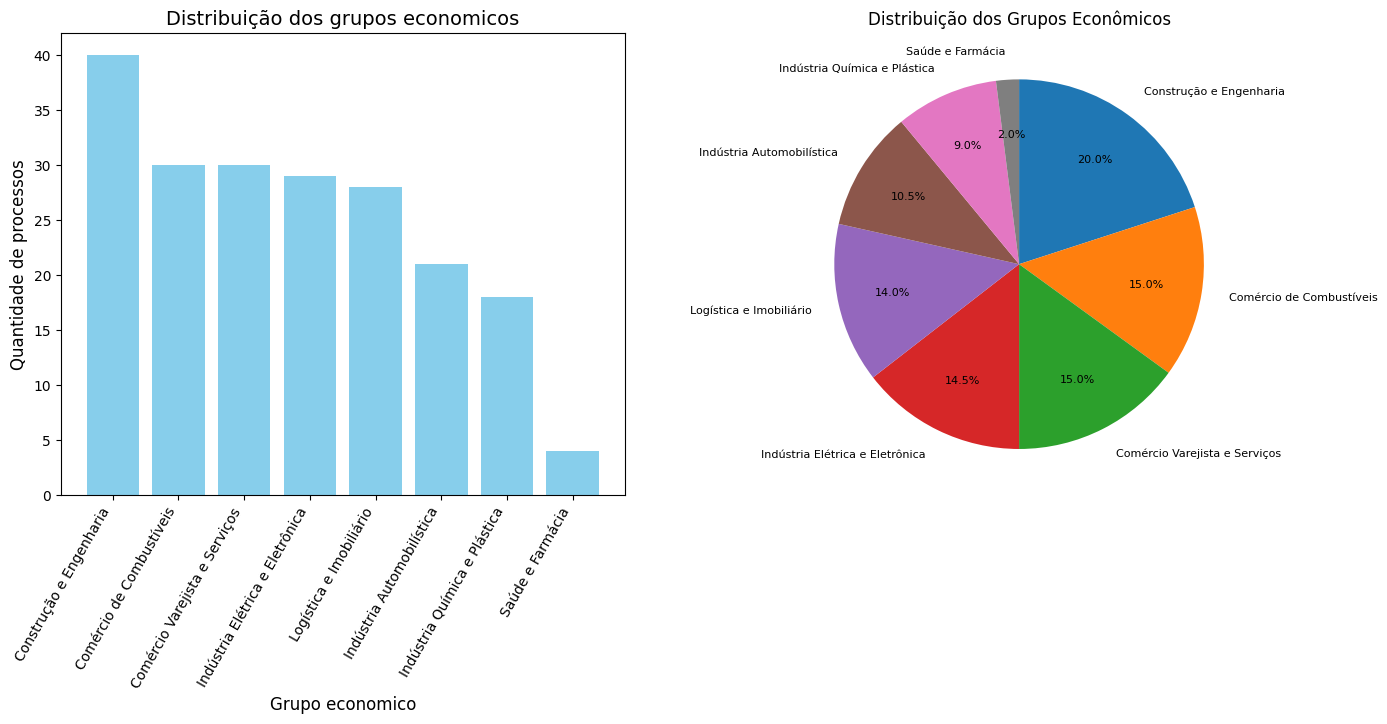

In [53]:
plt.figure(figsize=(16,6))

contagem = df['grupo_setor'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos grupos economicos', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos Grupos Econômicos')

plt.show()

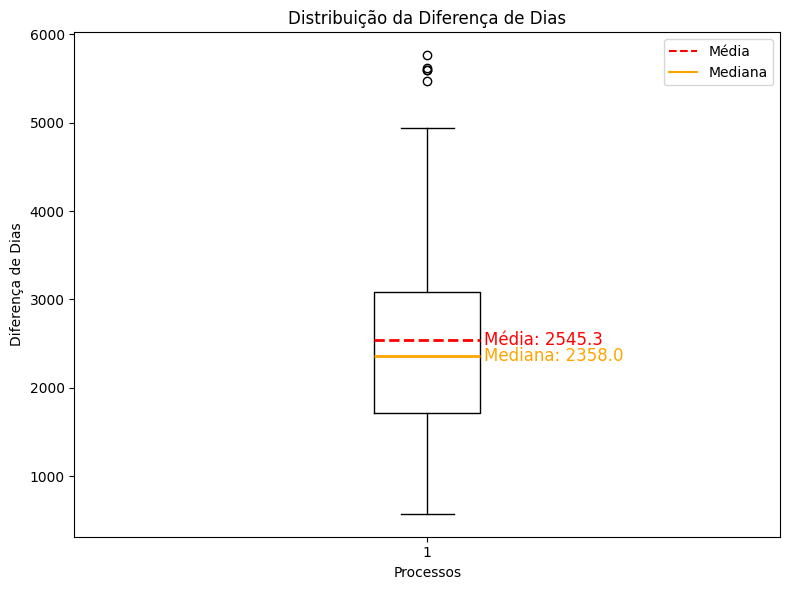

In [54]:
# Supondo que df já está definido
dados = df['diferenca_dias']

media = np.mean(dados)
mediana = np.median(dados)

fig, ax = plt.subplots(figsize=(8,6))

box = ax.boxplot(dados, showmeans=True, meanline=True,
                 meanprops=dict(color='red', linewidth=2),
                 medianprops=dict(color='orange', linewidth=2))

ax.set_title('Distribuição da Diferença de Dias')
ax.set_xlabel('Processos')
ax.set_ylabel('Diferença de Dias')

# Adiciona legenda
ax.annotate(f'Média: {media:.1f}', xy=(1.08, media), xycoords=('data', 'data'),
            color='red', fontsize=12, va='center')
ax.annotate(f'Mediana: {mediana:.1f}', xy=(1.08, mediana), xycoords=('data', 'data'),
            color='orange', fontsize=12, va='center')

# Adiciona legenda
import matplotlib.lines as mlines
mean_line = mlines.Line2D([], [], color='red',linestyle='--', label='Média')
median_line = mlines.Line2D([], [], color='orange', label='Mediana')
ax.legend(handles=[mean_line, median_line])

plt.tight_layout()
plt.show()

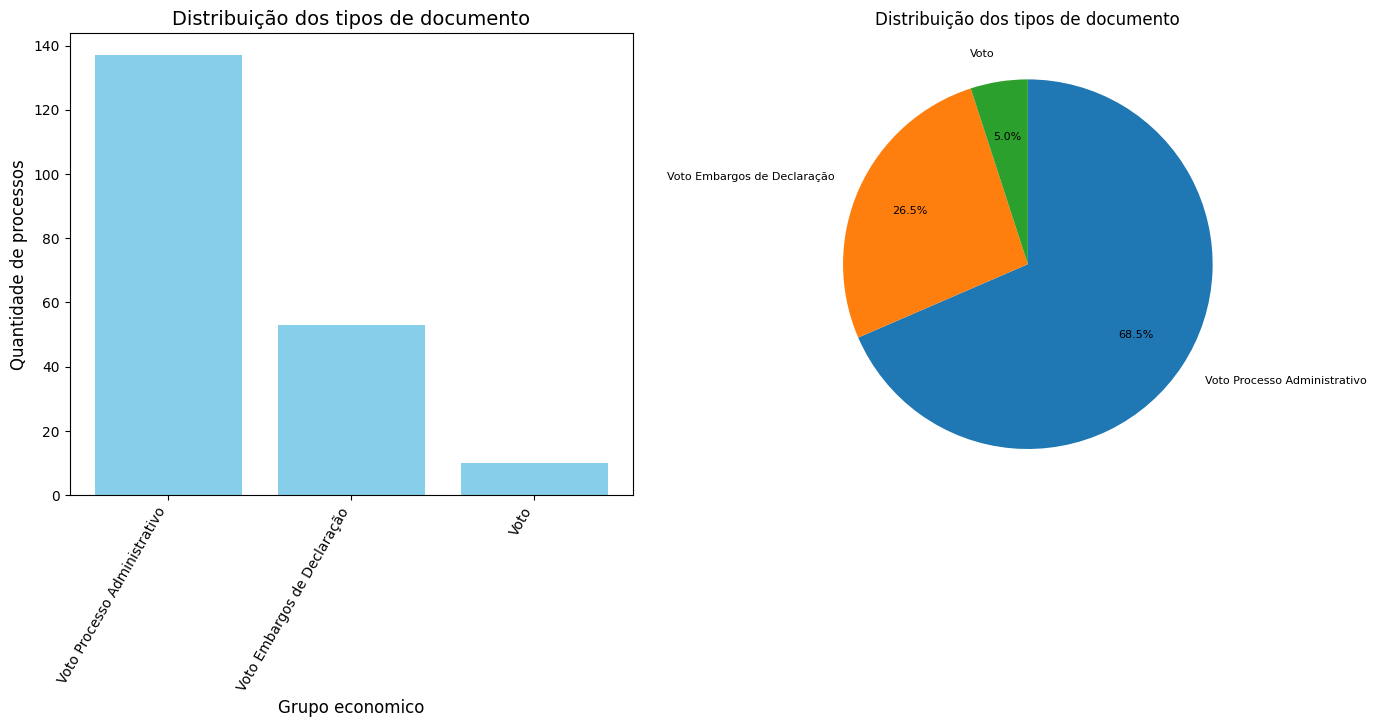

In [55]:
plt.figure(figsize=(16,6))

contagem = df['descricao_tipo_documento'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos tipos de documento', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos tipos de documento')

plt.show()

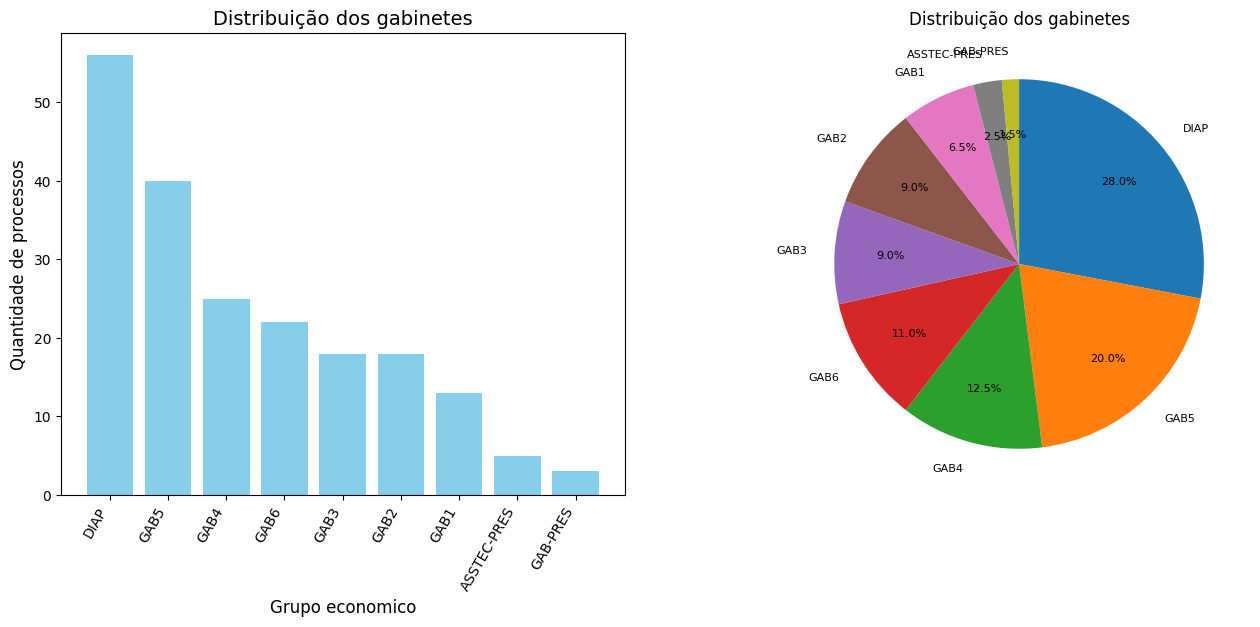

In [56]:
plt.figure(figsize=(16,6))

contagem = df['sigla_unidade'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos gabinetes', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos gabinetes')

plt.show()

In [57]:
#df_condenados = df.loc[df['decisao_tribunal'] == 'condenacao']


# Supondo que seu DataFrame se chama df
# Crie uma coluna binária: 1 para condenado, 0 para outros
df['taxa_condenacao_gabinete'] = (df['decisao_tribunal'] == 'condenacao').astype(int)

# Agrupe por gabinete e calcule a taxa de condenação
taxa_condenacao = df.groupby('sigla_unidade')['taxa_condenacao_gabinete'].mean().reset_index()
print(taxa_condenacao)
taxa_condenacao.columns = ['sigla_unidade', 'taxa_condenacao']


  sigla_unidade  taxa_condenacao_gabinete
0   ASSTEC-PRES                  0.800000
1          DIAP                  0.750000
2      GAB-PRES                  0.333333
3          GAB1                  0.538462
4          GAB2                  0.777778
5          GAB3                  0.666667
6          GAB4                  0.600000
7          GAB5                  0.725000
8          GAB6                  0.909091


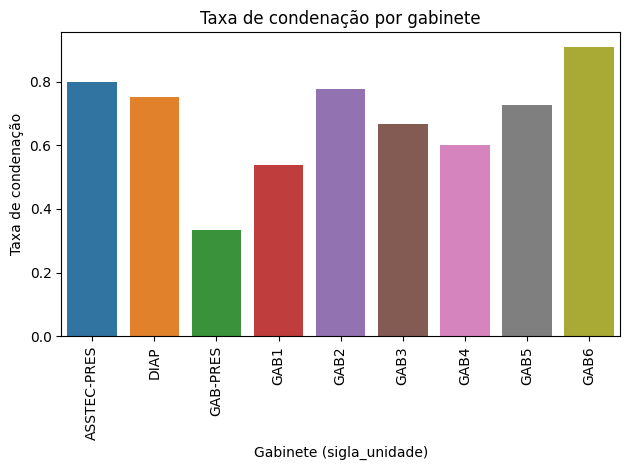

In [58]:
sb.barplot(x='sigla_unidade', y='taxa_condenacao', data=taxa_condenacao)
plt.xticks(rotation=90)
plt.title('Taxa de condenação por gabinete')
plt.xlabel('Gabinete (sigla_unidade)')
plt.ylabel('Taxa de condenação')
plt.tight_layout()
plt.show()

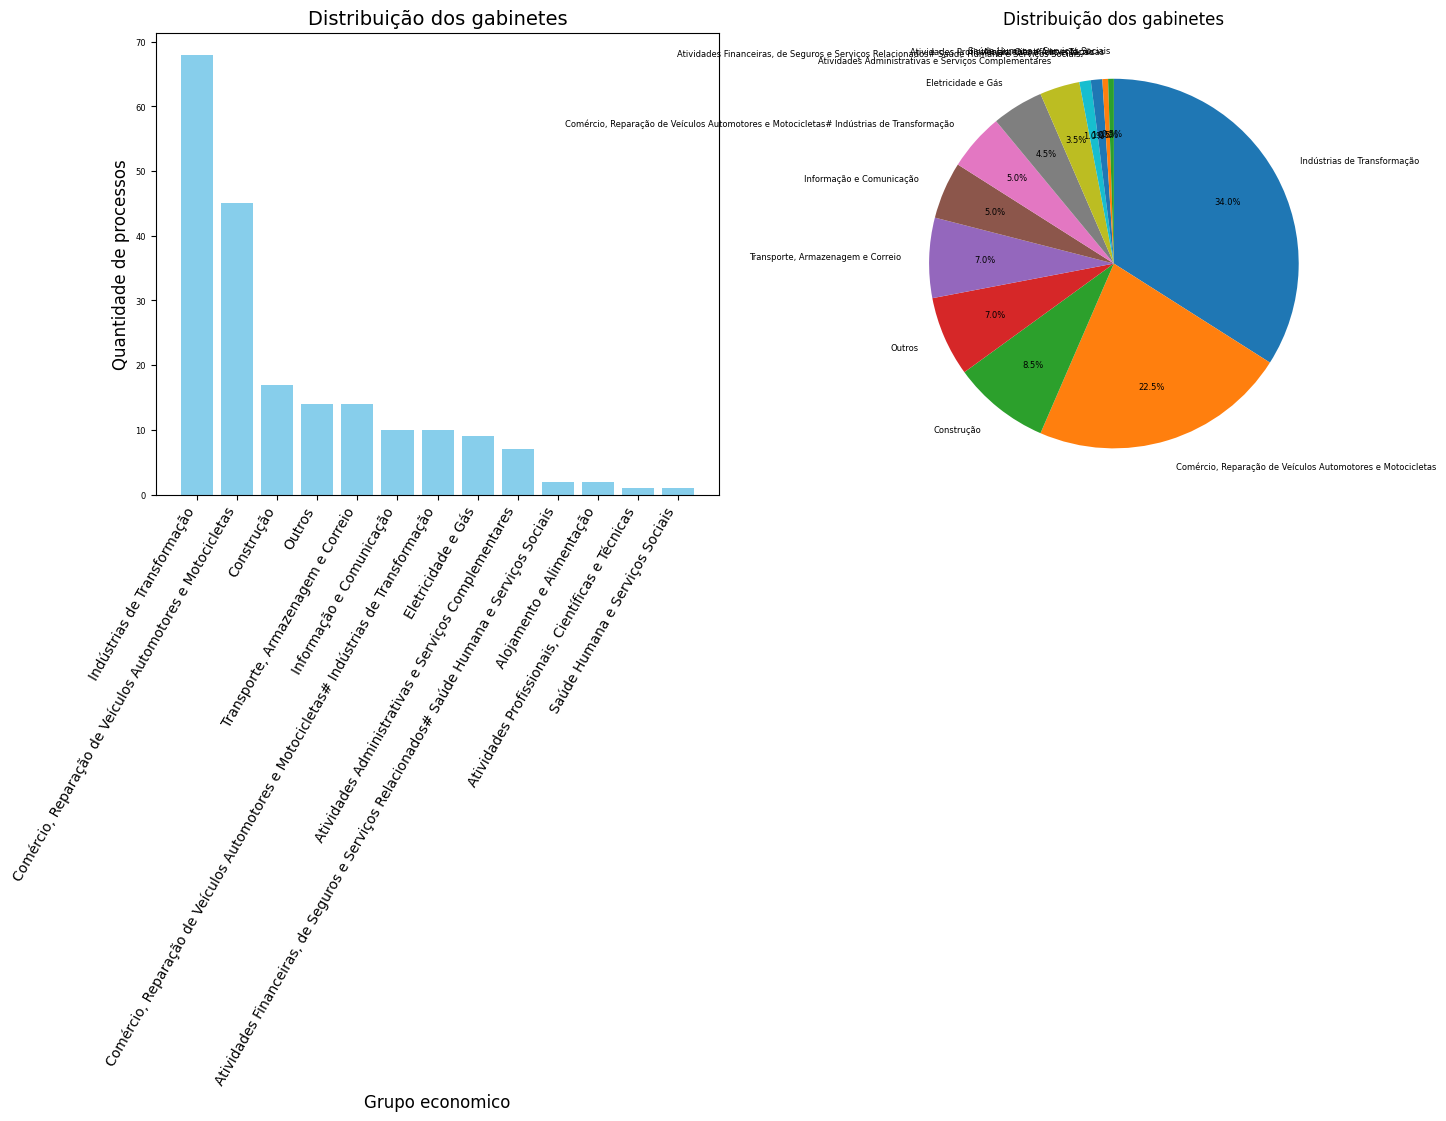

In [59]:
plt.figure(figsize=(16,6))

contagem = df['setor_economico_secao'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos gabinetes', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 6)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 6}  
)
plt.title('Distribuição dos gabinetes')

plt.show()

In [60]:
df['grupo_setor'].value_counts()



grupo_setor
Construção e Engenharia            40
Comércio de Combustíveis           30
Comércio Varejista e Serviços      30
Indústria Elétrica e Eletrônica    29
Logística e Imobiliário            28
Indústria Automobilística          21
Indústria Química e Plástica       18
Saúde e Farmácia                    4
Name: count, dtype: int64

In [61]:
df['grupo_setor'] = df['grupo_setor'].replace(
    df['grupo_setor'].value_counts()[df['grupo_setor'].value_counts() < 2].index,
    'Outros')

df['grupo_setor'].value_counts()

grupo_setor
Construção e Engenharia            40
Comércio de Combustíveis           30
Comércio Varejista e Serviços      30
Indústria Elétrica e Eletrônica    29
Logística e Imobiliário            28
Indústria Automobilística          21
Indústria Química e Plástica       18
Saúde e Farmácia                    4
Name: count, dtype: int64

In [67]:
stop_words_pt = stopwords.words('portuguese')

# 2. Pré-processamento básico
# Selecionar features e target
features = ['ano_documento', 'assinaturas', 'descricao_tipo_documento', 
           'decisao_tribunal', 'setor_economico_secao','grupo_setor', 'diferenca_dias',
           'sigla_unidade', 'taxa_condenacao_gabinete', 'descricao_especificacao','mercado_relevante', 'conteudo']
target = 'decisao_tribunal'  # Supondo que esta coluna exista nos dados

X = df[features]
y = df[target]

# 3. Divisão treino-teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.1, 
    random_state=42,
    stratify=X['grupo_setor']  # Estratificação por setor econômico
)

# 4. Pipeline de pré-processamento
# Definir colunas por tipo
categorical_features = ['descricao_tipo_documento', 'decisao_tribunal', 'setor_economico_secao', 'mercado_relevante', 'sigla_unidade', 'assinaturas']
numerical_features = ['ano_documento', 'taxa_condenacao_gabinete', 'diferenca_dias']
text_features = ['descricao_especificacao', 'conteudo']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('text', TfidfVectorizer(max_features=500, stop_words=stop_words_pt), text_features[0]),
        ('text2', TfidfVectorizer(max_features=500, stop_words=stop_words_pt), text_features[1])
    ],
    remainder='drop'
)

# 5. Modelos
# Gradient Boosting
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ))
])

# Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        random_state=42,
        n_jobs=-1
    ))
])

# 6. Treinamento
gb_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)



ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
# 7. Avaliação
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R²': r2_score(y_test, y_pred)
    }
    
    return metrics




In [ ]:
gb_metrics = evaluate_model(gb_pipeline, X_test, y_test)
rf_metrics = evaluate_model(rf_pipeline, X_test, y_test)



In [ ]:
# 8. Interpretação (Feature Importance)
# Para Random Forest
rf_feature_importances = rf_pipeline.named_steps['regressor'].feature_importances_

# Para Gradient Boosting
gb_feature_importances = gb_pipeline.named_steps['regressor'].feature_importances_

# 9. Otimização de hiperparâmetros (exemplo para Gradient Boosting)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

grid_search = GridSearchCV(
    gb_pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_gb_model = grid_search.best_estimator_